<a href="https://colab.research.google.com/github/ffelfis/OrgaDatosTPs/blob/main/TP1/nb_facundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Paquete para manejo de mapas
!pip install geopandas
# Para leer shape files con el paque 'shapefile' (contienen geometría de mapas)
!pip install pyshp

     |████████████████████████████████| 1.0MB 29.3MB/s 
     |████████████████████████████████| 6.5MB 30.0MB/s 
     |████████████████████████████████| 15.3MB 221kB/s 
     |████████████████████████████████| 225kB 28.9MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=af71a8be3d502059121309a76f5c052846c20af54ab6f1539d55814748d899f1
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built pyshp


In [4]:
import pandas as pd
import numpy as np
import geopandas as gpd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Lectura de Dataset desde Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Análisis de train_values.csv

In [31]:
df = pd.read_csv('/content/gdrive/My Drive/75.06 - Organización de Datos/TP1/Data/train_values.csv')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [8]:
memoria = df.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 176.95 MiB


No hay columnas con datos nulos.

Se puede reallizar un cambio de tipo a las columnas para ajustar el uso de memoria.

### Columnas numéricas

`building_id`: \[4, 1052934\] $\rightarrow$ int32

`geo_level_1_id`: \[0, 30\] $\rightarrow$ int8

`geo_level_2_id`: \[0, 1427\] $\rightarrow$ int16

`geo_level_3_id`: \[0, 12567\] $\rightarrow$ int16

`count_floors_pre_eq`: \[0, 9\] $\rightarrow$ int8

`age`: \[0, 995\] $\rightarrow$ int16

`area_percentage`: \[0, 100\] $\rightarrow$ int8

`height_percentage`: \[2, 32\] $\rightarrow$ int8

`count_families`: \[0, 9\] $\rightarrow$ int8

In [9]:
df.loc[:, 'building_id':'height_percentage'].describe().astype('int64').loc[['max', 'min'], :]

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage
max,1052934,30,1427,12567,9,995,100,32
min,4,0,0,0,1,0,1,2


In [33]:
df['building_id'] = df['building_id'].astype('int32')
df['geo_level_1_id'] = df['geo_level_1_id'].astype('int8')
df['geo_level_2_id'] = df['geo_level_2_id'].astype('int16')
df['geo_level_3_id'] = df['geo_level_3_id'].astype('int16')
df['count_floors_pre_eq'] = df['count_floors_pre_eq'].astype('int8')
df['age'] = df['age'].astype('int16')
df['area_percentage'] = df['area_percentage'].astype('int8')
df['height_percentage'] = df['height_percentage'].astype('int8')
df['count_families'] = df['count_families'].astype('int8')

In [11]:
memoria = df.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 162.79 MiB


### Columnas booleanas

`has_superstructure_adobe_mud`, `has_superstructure_mud_mortar_stone`, `has_superstructure_stone_flag`, 
`has_superstructure_cement_mortar_stone`, `has_superstructure_mud_mortar_brick`, `has_superstructure_cement_mortar_brick`, `has_superstructure_timber`, `has_superstructure_bamboo`, `has_superstructure_rc_non_engineered`, `has_superstructure_rc_engineered`, `has_superstructure_other`, `has_secondary_use`, `has_secondary_use_agriculture`, `has_secondary_use_hotel`, `has_secondary_use_rental`, `has_secondary_use_institution`, `has_secondary_use_school`, `has_secondary_use_industry`, `has_secondary_use_health_post`, `has_secondary_use_gov_office`, `has_secondary_use_use_police`, `has_secondary_use_other`

Todas tienen valores \[0, 1\] $\Longrightarrow$ bool

In [34]:
df['has_superstructure_adobe_mud'] = df['has_superstructure_adobe_mud'].astype('bool')
df['has_superstructure_mud_mortar_stone'] = df['has_superstructure_mud_mortar_stone'].astype('bool')
df['has_superstructure_stone_flag'] = df['has_superstructure_stone_flag'].astype('bool')
df['has_superstructure_cement_mortar_stone'] = df['has_superstructure_cement_mortar_stone'].astype('bool')
df['has_superstructure_mud_mortar_brick'] = df['has_superstructure_mud_mortar_brick'].astype('bool')
df['has_superstructure_cement_mortar_brick'] = df['has_superstructure_cement_mortar_brick'].astype('bool')
df['has_superstructure_timber'] = df['has_superstructure_timber'].astype('bool')
df['has_superstructure_bamboo'] = df['has_superstructure_bamboo'].astype('bool')
df['has_superstructure_rc_non_engineered'] = df['has_superstructure_rc_non_engineered'].astype('bool')
df['has_superstructure_rc_engineered'] = df['has_superstructure_rc_engineered'].astype('bool')
df['has_superstructure_other'] = df['has_superstructure_other'].astype('bool')
df['has_secondary_use'] = df['has_secondary_use'].astype('bool')
df['has_secondary_use_agriculture'] = df['has_secondary_use_agriculture'].astype('bool')
df['has_secondary_use_hotel'] = df['has_secondary_use_hotel'].astype('bool')
df['has_secondary_use_rental'] = df['has_secondary_use_rental'].astype('bool')
df['has_secondary_use_institution'] = df['has_secondary_use_institution'].astype('bool')
df['has_secondary_use_school'] = df['has_secondary_use_school'].astype('bool')
df['has_secondary_use_industry'] = df['has_secondary_use_industry'].astype('bool')
df['has_secondary_use_health_post'] = df['has_secondary_use_health_post'].astype('bool')
df['has_secondary_use_gov_office'] = df['has_secondary_use_gov_office'].astype('bool')
df['has_secondary_use_use_police'] = df['has_secondary_use_use_police'].astype('bool')
df['has_secondary_use_other'] = df['has_secondary_use_other'].astype('bool')

In [13]:
memoria = df.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 124.51 MiB


### Columnas Categóricas

`land_surface_condition`, `foundation_type`, `roof_type`, `ground_floor_type`, `other_floor_type`, `position`, `plan_configuration`, `legal_ownership_status`

In [35]:
df['land_surface_condition'] = df['land_surface_condition'].astype('category')
df['foundation_type'] = df['foundation_type'].astype('category')
df['roof_type'] = df['roof_type'].astype('category')
df['ground_floor_type'] = df['ground_floor_type'].astype('category')
df['other_floor_type'] = df['other_floor_type'].astype('category')
df['position'] = df['position'].astype('category')
df['plan_configuration'] = df['plan_configuration'].astype('category')
df['legal_ownership_status'] = df['legal_ownership_status'].astype('category')

In [15]:
memoria = df.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 11.19 MiB


In [36]:
df.sample(3, random_state=42)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
111801,1023112,10,1224,11128,1,20,7,3,t,r,n,f,j,s,d,False,True,False,False,False,False,False,False,False,False,False,v,1,False,False,False,False,False,False,False,False,False,False,False
91817,64407,22,1101,12483,2,60,7,6,t,r,n,f,q,s,d,False,True,False,False,False,False,False,False,False,False,False,v,1,False,False,False,False,False,False,False,False,False,False,False
251661,967834,26,39,11440,2,50,6,5,t,r,n,v,q,s,d,False,False,False,False,True,False,False,False,False,False,False,v,1,False,False,False,False,False,False,False,False,False,False,False


# **[NO NECESARIO]** (Mapa)

## Mapa de Nepal

Se lee el archivo .shp con `shapefile`. Se requieren los archivos que acompañan al .shp.

In [17]:
sf_Nepal = shp.Reader('/content/gdrive/My Drive/75.06 - Organización de Datos/TP1/map_Nepal/np.shp')

In [18]:
# Identificación de campos (~ futuro índice de columnas)
sf_Nepal.fields

[('DeletionFlag', 'C', 1, 0),
 ['FIPS_ADMIN', 'C', 4, 0],
 ['GMI_ADMIN', 'C', 7, 0],
 ['ADMIN_NAME', 'C', 42, 0],
 ['FIPS_CNTRY', 'C', 2, 0],
 ['GMI_CNTRY', 'C', 3, 0],
 ['CNTRY_NAME', 'C', 40, 0],
 ['REGION', 'C', 21, 0],
 ['CONTINENT', 'C', 13, 0],
 ['POP_ADMIN', 'N', 9, 0],
 ['SQKM_ADMIN', 'N', 12, 3],
 ['SQMI_ADMIN', 'N', 12, 3],
 ['TYPE_ENG', 'C', 26, 0],
 ['TYPE_LOC', 'C', 50, 0],
 ['COLOR_MAP', 'C', 2, 0]]

In [19]:
# Datos de los campos anteriores
sf_Nepal.records()

[Record #0: ['NP01', 'NPL-BGM', 'Bagmati', 'NP', 'NPL', 'Nepal', 'Southern Asia', 'Asia', 2425622, 10119.83, 3907.266, 'Zone', 'Anchal', '11'],
 Record #1: ['NP02', 'NPL-BHE', 'Bheri', 'NP', 'NPL', 'Nepal', 'Southern Asia', 'Asia', 1188714, 9935.7, 3836.174, 'Zone', 'Anchal', '2'],
 Record #2: ['NP03', 'NPL-DHW', 'Dhawalagiri', 'NP', 'NPL', 'Nepal', 'Southern Asia', 'Asia', 529003, 8298.877, 3204.196, 'Zone', 'Anchal', '12'],
 Record #3: ['NP04', 'NPL-GND', 'Gandaki', 'NP', 'NPL', 'Nepal', 'Southern Asia', 'Asia', 1364467, 12719.73, 4911.088, 'Zone', 'Anchal', '2'],
 Record #4: ['NP05', 'NPL-JNK', 'Janakpur', 'NP', 'NPL', 'Nepal', 'Southern Asia', 'Asia', 2221955, 9708.168, 3748.324, 'Zone', 'Anchal', '1'],
 Record #5: ['NP06', 'NPL-KRN', 'Karnali', 'NP', 'NPL', 'Nepal', 'Southern Asia', 'Asia', 280763, 21710.609, 8382.467, 'Zone', 'Anchal', '10'],
 Record #6: ['NP07', 'NPL-KOS', 'Kosi', 'NP', 'NPL', 'Nepal', 'Southern Asia', 'Asia', 1862478, 9721.242, 3753.372, 'Zone', 'Anchal', '4'],

In [20]:
# Puntos de coordenadas para los bordes de los estados.
sf_Nepal.shape(1).points

[(82.06639862060547, 27.914154052734375),
 (82.04331970214844, 27.91860580444336),
 (81.99971008300781, 27.922218322753906),
 (81.97776794433594, 27.917217254638672),
 (81.96609497070312, 27.911941528320312),
 (81.95637512207031, 27.90583038330078),
 (81.93692016601562, 27.887496948242188),
 (81.91053771972656, 27.855274200439453),
 (81.90386962890625, 27.853328704833984),
 (81.89665222167969, 27.852497100830078),
 (81.88554382324219, 27.855274200439453),
 (81.88026428222656, 27.857219696044922),
 (81.78526306152344, 27.907772064208984),
 (81.78054809570312, 27.910552978515625),
 (81.772216796875, 27.917217254638672),
 (81.7269287109375, 27.955829620361328),
 (81.60748291015625, 28.01888656616211),
 (81.48970031738281, 28.074718475341797),
 (81.48027038574219, 28.079998016357422),
 (81.47608947753906, 28.083332061767578),
 (81.47248840332031, 28.08749771118164),
 (81.4708251953125, 28.094440460205078),
 (81.4708251953125, 28.10027313232422),
 (81.37442016601562, 28.166107177734375),
 (

Se lee el archivo .shp con geopandas.

In [21]:
map_df = gpd.read_file('/content/gdrive/My Drive/75.06 - Organización de Datos/TP1/map_Nepal/np.shp')

In [22]:
type(map_df)

geopandas.geodataframe.GeoDataFrame

In [25]:
map_df.sample(2, random_state=42)

,FIPS_ADMIN,GMI_ADMIN,ADMIN_NAME,FIPS_CNTRY,GMI_CNTRY,CNTRY_NAME,REGION,CONTINENT,POP_ADMIN,SQKM_ADMIN,SQMI_ADMIN,TYPE_ENG,TYPE_LOC,COLOR_MAP,geometry
9,NP10,NPL-MEC,Mechi,NP,NPL,Nepal,Southern Asia,Asia,1205060,8278.24,3196.229,Zone,Anchal,6,"POLYGON ((87.64304 26.39249, 87.66019 26.53019..."
11,NP12,NPL-RAP,Rapti,NP,NPL,Nepal,Southern Asia,Asia,1128149,10663.41,4117.143,Zone,Anchal,8,"POLYGON ((83.06585 28.23057, 83.01842 28.22085..."


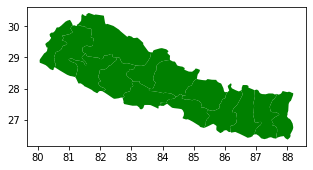

In [28]:
map_df.plot(figsize=(5,5), color='green')

plt.show()

# Análisis train_labels.csv

In [38]:
# Ruta train_labels.csv
dir_labels = '/content/gdrive/My Drive/75.06 - Organización de Datos/TP1/Data/train_labels.csv'

df_labels = pd.read_csv(dir_labels)

In [49]:
df_labels.describe().loc[['min', 'max'], 'damage_grade'].to_frame()

,damage_grade
min,1.0
max,3.0


In [50]:
memoria = df_labels.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 3.98 MiB


In [51]:
df_labels['damage_grade'] = df_labels['damage_grade'].astype('int8')

In [52]:
memoria = df_labels.memory_usage(deep=True).sum()/(2**20)
print('Se usan', np.round(memoria, 2), 'MiB')

Se usan 2.24 MiB


In [54]:
df = df.merge(df_labels, on='building_id', how='inner')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int32   
 1   geo_level_1_id                          260601 non-null  int8    
 2   geo_level_2_id                          260601 non-null  int16   
 3   geo_level_3_id                          260601 non-null  int16   
 4   count_floors_pre_eq                     260601 non-null  int8    
 5   age                                     260601 non-null  int16   
 6   area_percentage                         260601 non-null  int8    
 7   height_percentage                       260601 non-null  int8    
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

Las filas mantienen el mismo número, 260601, por lo que los `building_id` tenían su correpondiente fila de labels.

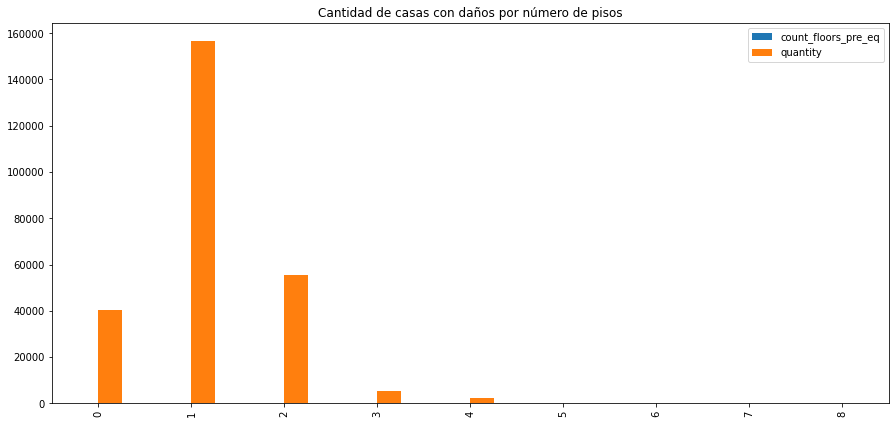

In [85]:
df.groupby('count_floors_pre_eq').agg({'damage_grade':'count'}).reset_index().rename(columns={'damage_grade':'quantity'})\
  .plot(kind='bar', figsize=(15,7), title='Cantidad de casas con daños por número de pisos')

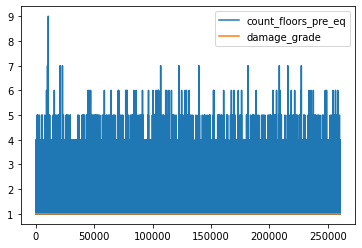

In [62]:
df.loc[df['damage_grade'] == 1].loc[:, ['count_floors_pre_eq', 'damage_grade']].plot()

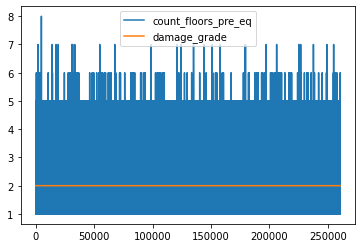

In [63]:
df.loc[df['damage_grade'] == 2].loc[:, ['count_floors_pre_eq', 'damage_grade']].plot()

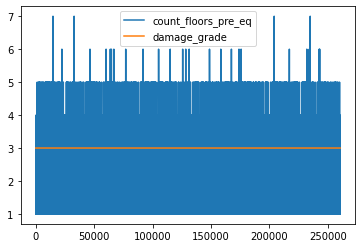

In [64]:
df.loc[df['damage_grade'] == 3].loc[:, ['count_floors_pre_eq', 'damage_grade']].plot()